In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from itertools import product

C:\Users\joypa\AppData\Local\Temp\ipykernel_22904\2818863710.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [235]:
# Read the CSV files into pandas DataFrames
df1 = pd.read_csv('F:/Works/Collaborative Application Development/Day Data/GP21_updated_days.csv')  # Replace with the actual file path
df2 = pd.read_csv('F:/Works/Collaborative Application Development/Day Data/NP21_updated_days.csv')  # Replace with the actual file path

In [236]:
# Drop the 'Date' column from both DataFrames
df1 = df1.drop('Date', axis=1)
df2 = df2.drop('Date', axis=1)

In [237]:
# Extract 'Total Registered' column
total_registered_df1 = df1['Total Registered']
total_registered_df1 = total_registered_df1[-70:]

# Extract 'Total Registered' column
total_registered_df2 = df2['Total Registered']
total_registered_df2 = total_registered_df2[-70:]

In [238]:
# Reset index for both DataFrames
total_registered_df1.reset_index(drop=True, inplace=True)
total_registered_df2.reset_index(drop=True, inplace=True)

In [239]:
# Concatenate the DataFrames along the columns axis
df = pd.concat([total_registered_df1, total_registered_df2], axis=1)

In [240]:
# Calculate the mean along the columns axis to combine the values into a single column
df['Total Registered Data'] = df.mean(axis=1).round().astype(int)  # You can replace 'mean' with 'median', 'sum', or any other aggregation function

# Drop the original columns from the concatenated DataFrame
df = df.drop(['Total Registered'], axis=1)

In [241]:
df.reset_index(drop=True, inplace=True)

# Add a new column named "Day" starting from 1
df['Day'] = 'Day ' + (df.index + 1).astype(str)
print(df)

# Save the DataFrame to a CSV file
#df.to_csv('F:/Works/Collaborative Application Development/Merged Dataset (Last 10 Weeks)/Property_Managers.csv', index=False)

    Total Registered Data     Day
0                       1   Day 1
1                       1   Day 2
2                       1   Day 3
3                      14   Day 4
4                       4   Day 5
..                    ...     ...
65                      1  Day 66
66                      6  Day 67
67                     10  Day 68
68                     15  Day 69
69                      2  Day 70

[70 rows x 2 columns]


In [242]:
# Preprocess the data
total_registered = df['Total Registered Data'].values.reshape(-1, 1)

In [253]:
#For MSE21

# Load your DataFrame from the CSV file
df = pd.read_csv('F:/Works/Collaborative Application Development/Day Data/MSE21_updated_days.csv')

# Drop unnecessary columns
df = df.drop(['Date', 'Day'], axis=1)

# Extract the last 70 rows from the DataFrame
total_registered = df['Total Registered'].tail(70)

# Create a new DataFrame for the last 70 rows with a new 'Day' column
day_column = ['Day ' + str(i) for i in range(1, len(total_registered) + 1)]
day_df = pd.DataFrame({'Total Registered': total_registered.values, 'Day': day_column})

# Save the DataFrame to a CSV file
#day_df.to_csv('F:/Works/Collaborative Application Development/Merged Dataset (Last 10 Weeks)/Education_Property_Managers.csv', index=False)

# Ensure 'Day' is treated as a categorical variable
day_df['Day'] = day_df['Day'].astype('category')
# Extract 'Total Registered' column
total_registered = day_df['Total Registered'].values.reshape(-1, 1)

In [254]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
total_registered_scaled = scaler.fit_transform(total_registered)

In [255]:
# Define the function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [256]:
# Define the sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(total_registered_scaled, seq_length)

In [257]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [259]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=150, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
6/6 - 4s - loss: 0.0655 - val_loss: 0.0082 - 4s/epoch - 680ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0691 - val_loss: 0.0112 - 132ms/epoch - 22ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0648 - val_loss: 0.0047 - 150ms/epoch - 25ms/step
Epoch 4/100
6/6 - 0s - loss: 0.0630 - val_loss: 0.0053 - 124ms/epoch - 21ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0619 - val_loss: 0.0076 - 110ms/epoch - 18ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0604 - val_loss: 0.0124 - 120ms/epoch - 20ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0604 - val_loss: 0.0161 - 117ms/epoch - 19ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0609 - val_loss: 0.0138 - 154ms/epoch - 26ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0596 - val_loss: 0.0144 - 111ms/epoch - 19ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0597 - val_loss: 0.0172 - 134ms/epoch - 22ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0593 - val_loss: 0.0162 - 136ms/epoch - 23ms/step
Epoch 12/100
6/6 - 0s - loss: 0.0593 - val_loss: 0.0156 - 164ms/epoch - 27ms/step
Epoch 13/100
6/6 - 0s - los

In [260]:
# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.11439841892135527


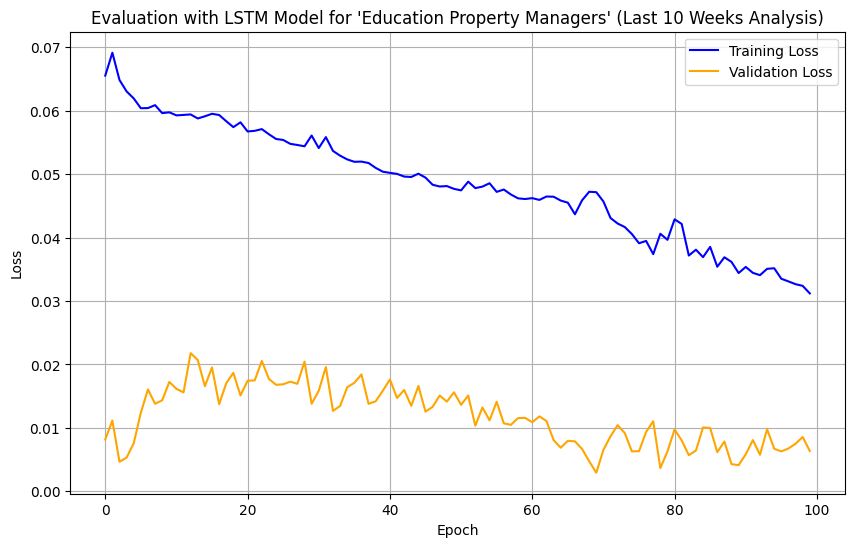

In [261]:
# Plot train, test, and prediction
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Evaluation with LSTM Model for 'Education Property Managers' (Last 10 Weeks Analysis)")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('F:/Works/Collaborative Application Development/Python/Images/LSTM/Merged/Last_10_weeks/Training/Education_Property_Managers_LSTM_80%.png')

In [262]:
# Forecast future values
future_steps = 42  # Define the number of future steps to forecast

# Initialize an array to store future predictions
future_predictions = []

# Use the last sequence from the test set to start predicting the future values
last_sequence = X_test[-1]

for _ in range(future_steps):
    # Reshape the last sequence to match the input shape of the model
    last_sequence = last_sequence.reshape((1, seq_length, 1))
    
    # Predict the next value
    next_prediction = model.predict(last_sequence)
    
    # Append the predicted value to the list of future predictions
    future_predictions.append(next_prediction[0][0])
    
    # Update the last sequence by removing the first value and adding the predicted value at the end
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_prediction

# Inverse transform the scaled predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 [==============================] - 0s 32ms/step


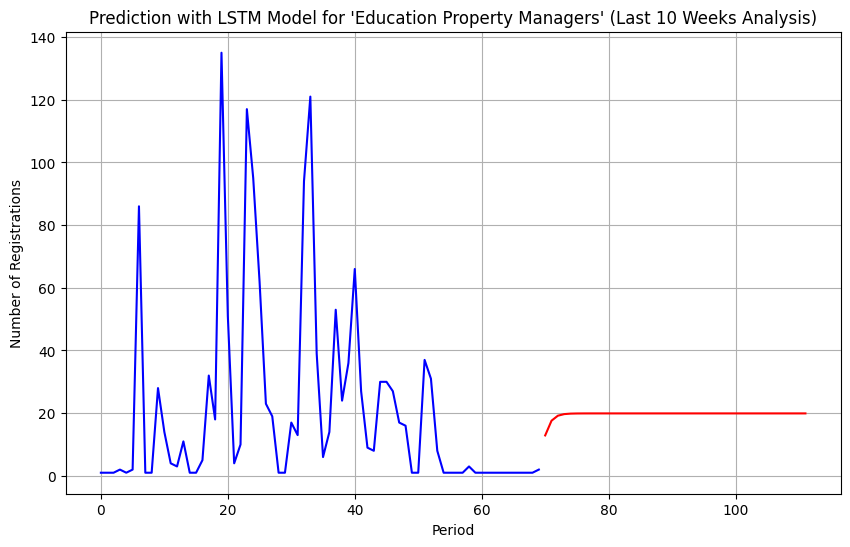

In [263]:
# Plot the original data and future predictions
plt.figure(figsize=(10, 6))
plt.plot(total_registered, label='Original Data', color='blue')
plt.plot(np.arange(len(total_registered), len(total_registered) + future_steps), future_predictions, label='Future Predictions', color='red')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title("Prediction with LSTM Model for 'Education Property Managers' (Last 10 Weeks Analysis)")
plt.grid(True)

# Save the figure
plt.savefig('F:/Works/Collaborative Application Development/Python/Images/LSTM/Merged/Last_10_weeks/Prediction/Education_Property_Managers_LSTM_80%.png')

In [ ]:
#............................................................................................................................#

In [258]:
# Define parameter ranges
units = [50, 100, 150]
activations = ['relu', 'tanh']
batch_sizes = [8, 16, 32]
epochs = [50, 100, 200]

# Generate all possible combinations of parameters
param_grid = product(units, activations, batch_sizes, epochs)

# Initialize variables to store optimal parameters and minimum RMSE
best_rmse = float('inf')
best_params = None

for unit, activation, batch_size, num_epochs in param_grid:
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=unit, activation=activation, input_shape=(seq_length, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predictions - y_test)**2))
    
    # Update best parameters if the current configuration has lower RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = (unit, activation, batch_size, num_epochs)

print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)

1/1 [==============================] - 1s 583ms/step
Best parameters: (150, 'tanh', 8, 100)
Best RMSE: 0.06704727383161378
